# Matplotlib and pylab inline

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Add path .. to make relative import

In [2]:
import sys

sys.path.insert(0, '..')

# Import libraries

In [3]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

from matplotlib import rcParams
from src.preparation.reading import *
from src.processing.standardization import standardize_image
from src.processing.preprocessing import preproc_image
from src.processing.noise import get_scalar_product_precentiles
from src.processing.holes import get_horizontal_vertical_mean_percentiles
from src.processing.pants import r_max_and_ds_percentiles

from pandas import DataFrame

rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = (4, 5)
rcParams["image.cmap"] = "gray"

## Read image

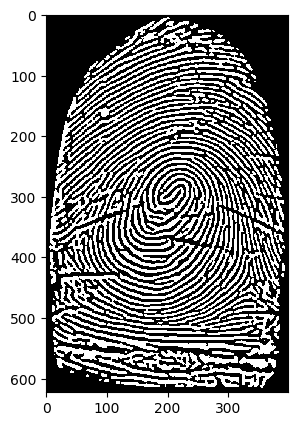

In [4]:
im = read_random_image(RAW_FILE_PATH_GOODIM)
std_im = standardize_image(im)
prep_im = preproc_image(std_im)

plt.imshow(prep_im)
plt.show()

In [5]:
get_scalar_product_precentiles(prep_im)

array([-0.58250805,  0.89011597,  0.97555909,  0.99222079])

In [6]:
get_horizontal_vertical_mean_percentiles(prep_im)

array([ 96.9       , 115.3875    , 134.385     , 185.5125    ,
       101.7953451 , 115.58908507, 126.06741573, 134.25361156,
       100.47      , 118.575     , 135.7875    , 183.6       ,
       103.964687  , 118.2905297 , 127.2953451 , 135.89085072])

In [7]:
r_max_and_ds_percentiles(prep_im)

array([ 0.05636056,  0.06475191,  0.13357654,  0.0452328 ,  0.0535829 ,
        0.10911701,  0.17093592,  0.19403276,  0.24786928,  3.        ,
        4.        ,  7.        ,  3.        ,  4.        , 10.        ,
        3.        ,  3.        ,  6.        ])

In [8]:
def features(im, sp_ksize=13, sp_precs=[0, 20, 40, 60], hv_percs=[30, 60, 90, 100],
             r_percs=[90, 95, 100], ds_percs=[90, 95, 100]):
    feats = np.array([])
    
    sp = get_scalar_product_precentiles(im, ksize=sp_ksize, percs=sp_precs)
    hv_means = get_horizontal_vertical_mean_percentiles(im, percs=hv_percs)
    rds = r_max_and_ds_percentiles(im, r_percs=r_percs, ds_percs=ds_percs)
    
    feats = np.append(feats, sp)
    feats = np.append(feats, hv_means)
    feats = np.append(feats, rds)
    
    return feats

In [9]:
features(prep_im)

array([-5.82508054e-01,  8.90115968e-01,  9.75559090e-01,  9.92220790e-01,
        9.69000000e+01,  1.15387500e+02,  1.34385000e+02,  1.85512500e+02,
        1.01795345e+02,  1.15589085e+02,  1.26067416e+02,  1.34253612e+02,
        1.00470000e+02,  1.18575000e+02,  1.35787500e+02,  1.83600000e+02,
        1.03964687e+02,  1.18290530e+02,  1.27295345e+02,  1.35890851e+02,
        5.63605576e-02,  6.47519132e-02,  1.33576542e-01,  4.52327973e-02,
        5.35829002e-02,  1.09117009e-01,  1.70935923e-01,  1.94032756e-01,
        2.47869282e-01,  3.00000000e+00,  4.00000000e+00,  7.00000000e+00,
        3.00000000e+00,  4.00000000e+00,  1.00000000e+01,  3.00000000e+00,
        3.00000000e+00,  6.00000000e+00])

# Use Linear SVC for image classification

## Function for getting data

In [10]:
def get_xy_ims(filepath, images, x, y, y_val=1):
    
    for name in os.listdir(filepath):
        path = filepath + name
        im = cv.imread(path, cv.IMREAD_GRAYSCALE)
        
        if path == None:
            continue
        
        std_im = standardize_image(im)
        prep_im = preproc_image(std_im)
        percentiles = features(prep_im)

        images.append(prep_im)
        x.append(percentiles)
        y.append(y_val)
    

## Get data

In [11]:
images, x, y = [], [], []


get_xy_ims(RAW_FILE_PATH_GOODIM, images, x, y)
get_xy_ims(RAW_FILE_PATH_SCANS, images, x, y)
get_xy_ims(RAW_FILE_PATH_BADIM_PANTS, images, x, y, y_val=0)
get_xy_ims(RAW_FILE_PATH_BADIM_HOLES, images, x, y, y_val=0)
get_xy_ims(RAW_FILE_PATH_BADIM_NOISE, images, x, y, y_val=0)

images = np.array(images)
x = np.array(x)
y = np.array(y)

DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.706244,0.852309,0.963502,0.989765,97.5375,115.3875,133.87500,168.9375,103.355072,117.850242,...,0.259615,5.0,6.0,9.0,3.0,3.0,7.0,3.0,3.0,6.0
1,-0.713907,0.860992,0.968719,0.990642,94.3500,113.4750,131.32500,180.4125,101.022364,116.094249,...,0.194165,3.0,4.0,7.0,3.0,4.0,8.0,3.0,4.0,5.0
2,-0.666742,0.712823,0.894258,0.965105,96.9000,114.1125,131.32500,165.1125,98.817734,115.566502,...,0.171734,4.0,4.0,7.0,4.0,4.0,9.0,4.0,4.0,7.0
3,-0.790697,0.775915,0.932742,0.981159,97.5375,111.5625,123.03750,172.7625,100.636792,115.632075,...,0.233790,3.0,4.0,6.0,3.0,4.0,8.0,3.0,3.0,5.0
4,-0.709931,0.847999,0.964415,0.990398,95.6250,110.9250,126.22500,150.4500,97.462205,116.456693,...,0.268878,4.0,4.0,8.0,3.0,4.0,6.0,3.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,-0.734430,0.553531,0.747550,0.859444,101.3625,117.3000,132.72750,163.8375,100.443662,120.676056,...,0.284789,3.0,4.0,7.0,3.0,4.0,7.0,3.0,4.0,6.0
109,-0.717872,0.515440,0.710598,0.828593,94.9875,112.8375,131.00625,161.2875,95.424528,115.231132,...,0.276295,4.0,5.0,8.0,4.0,5.0,8.0,4.0,4.0,8.0
110,-0.668537,0.605885,0.784670,0.882801,102.0000,116.0250,128.13750,195.0750,104.271094,120.328125,...,0.220660,3.0,3.0,6.0,4.0,4.0,7.0,3.0,4.0,6.0
111,-0.753823,0.644448,0.830587,0.922459,100.0875,113.7300,126.22500,168.9375,99.571429,116.571429,...,0.204348,4.0,4.0,8.0,3.0,4.0,6.0,3.0,4.0,6.0


## Train LinearSVC and get

Является плохим, считается хорошим [-6.63276991e-01  5.98065952e-01  7.77519297e-01  8.75087482e-01
  1.00725000e+02  1.16662500e+02  1.30687500e+02  1.65112500e+02
  1.04789062e+02  1.19929688e+02  1.30289062e+02  1.54593750e+02
  9.92587500e+01  1.14112500e+02  1.26225000e+02  1.86787500e+02
  9.98882813e+01  1.17937500e+02  1.29890625e+02  1.43437500e+02
  6.48146737e-02  7.47798681e-02  1.45077252e-01  4.44034490e-02
  7.24102783e-02  1.10125506e-01  6.43665438e-02  9.05064592e-02
  2.49155064e-01  4.00000000e+00  5.00000000e+00  9.00000000e+00
  3.00000000e+00  4.00000000e+00  6.00000000e+00  3.00000000e+00
  4.00000000e+00  7.00000000e+00]


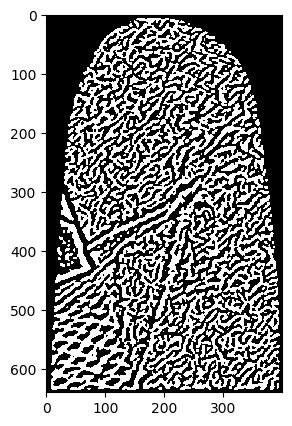

Done


In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc = LinearSVC(max_iter=100000000)
svc.fit(x, y)

predict = svc.predict(x)
bool_predict = predict != y


for im, good, percs in zip(images[bool_predict], y[bool_predict], x[bool_predict]):
    
    if good:
        print("Является хорошим, считается плохим", percs)
    else:
        print("Является плохим, считается хорошим", percs)
    
    plt.imshow(im, cmap=plt.cm.gray)
    plt.show()
    
print("Done")

[1]


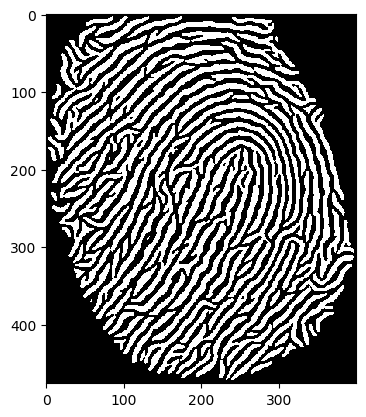

[0]


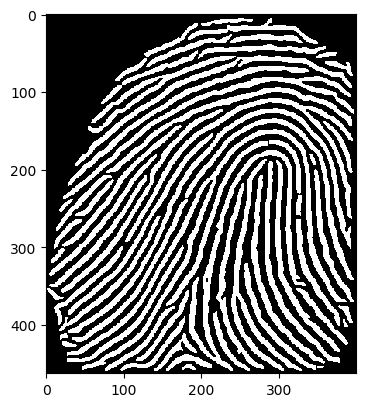

[0]


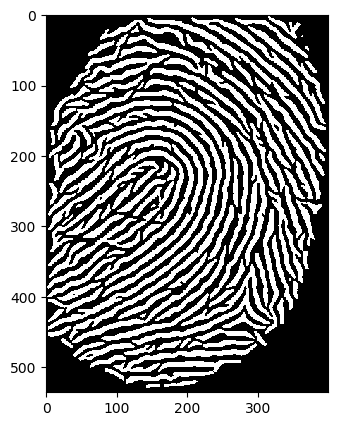

[0]


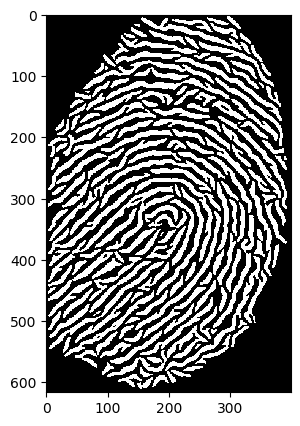

[1]


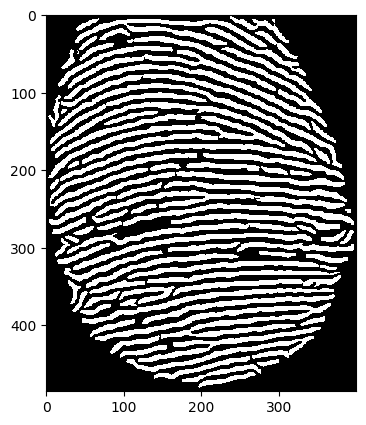

[1]


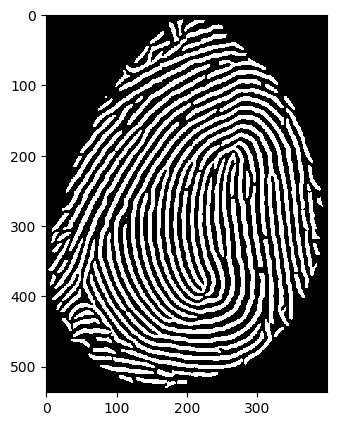

[0]


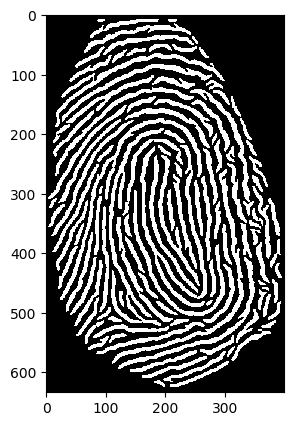

[0]


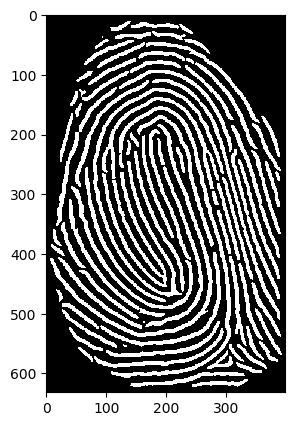

[0]


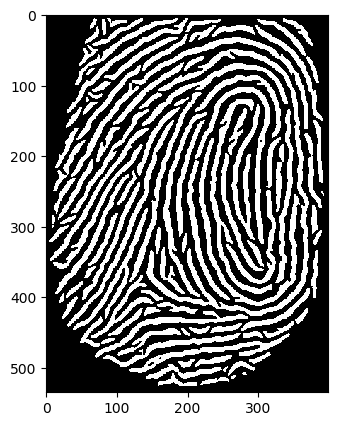

[1]


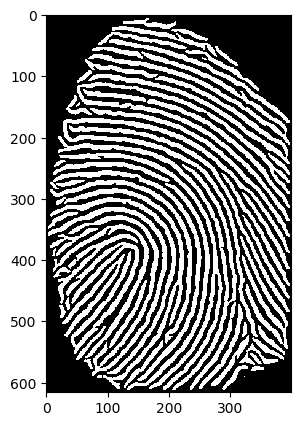

[0]


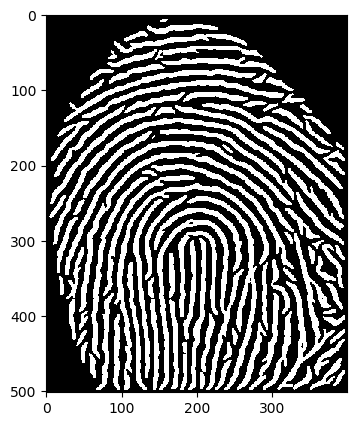

[0]


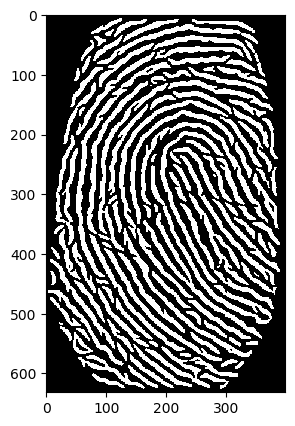

[0]


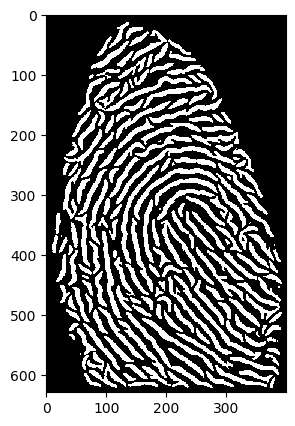

[0]


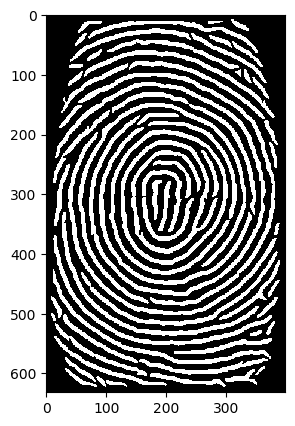

[0]


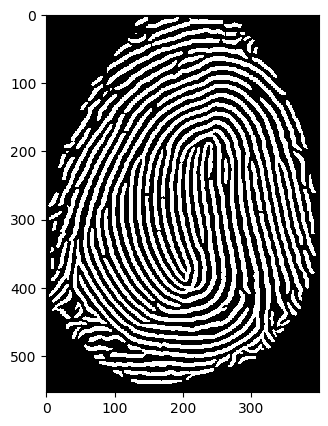

[0]


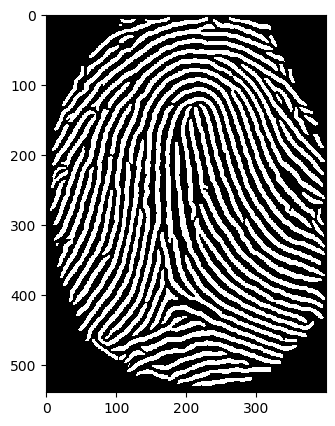

[0]


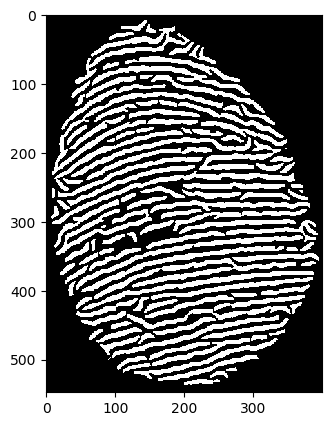

[0]


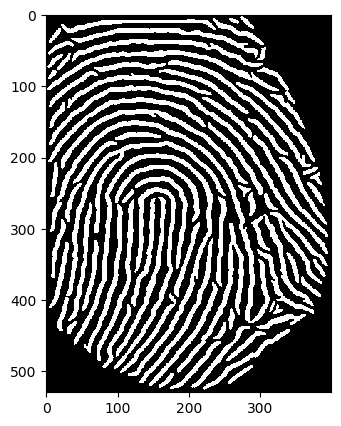

[1]


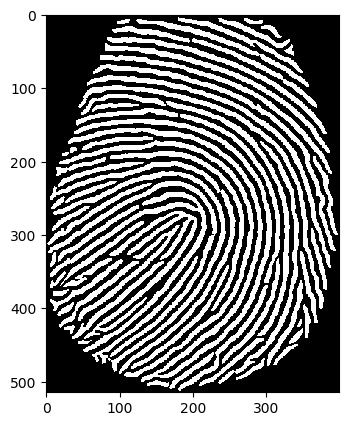

[0]


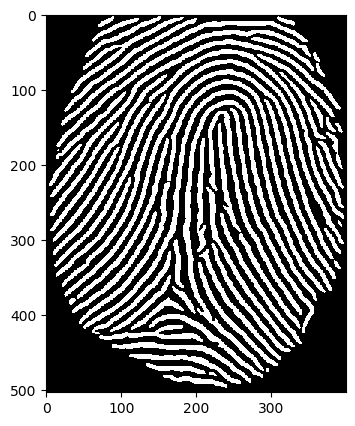

[0]


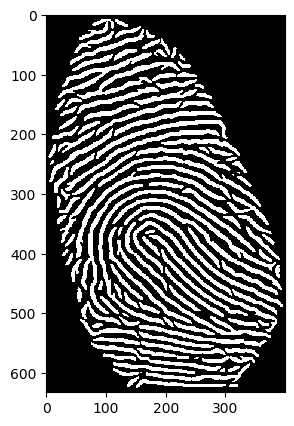

[0]


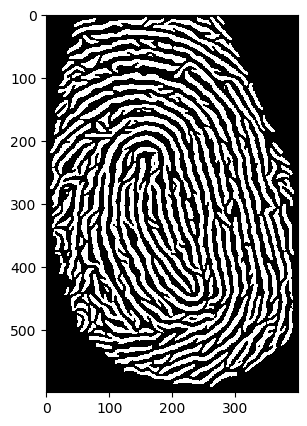

[0]


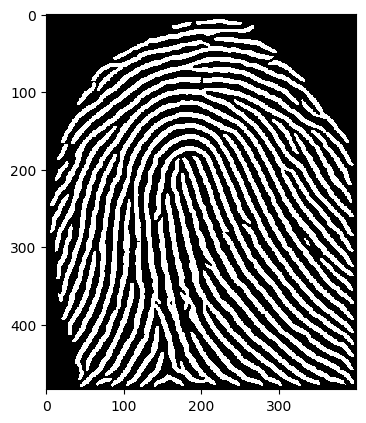

[0]


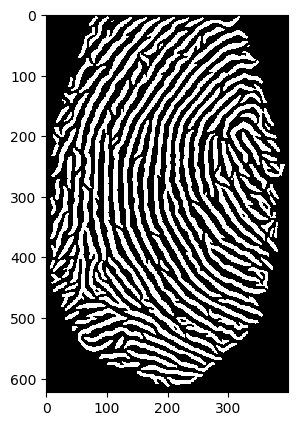

[0]


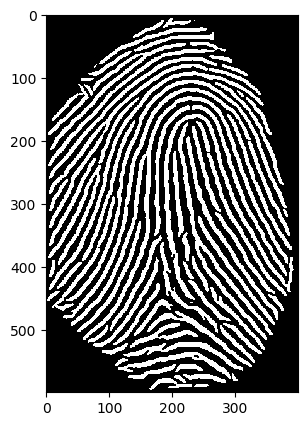

[0]


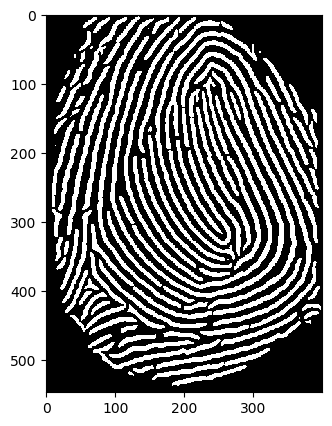

[0]


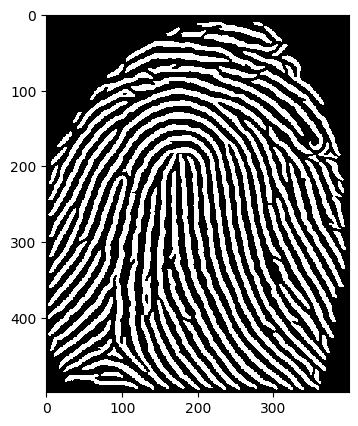

[1]


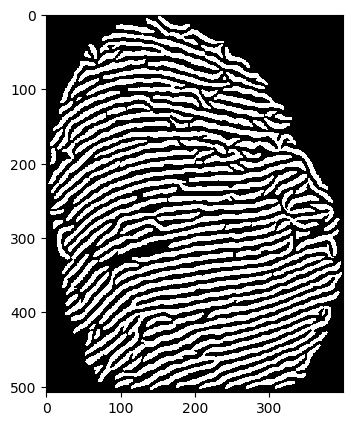

[1]


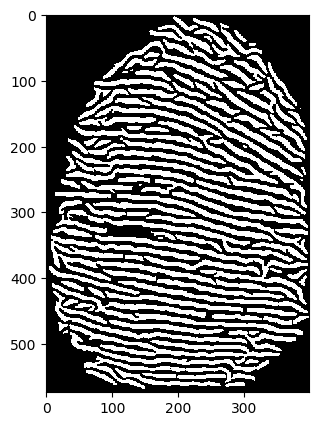

[1]


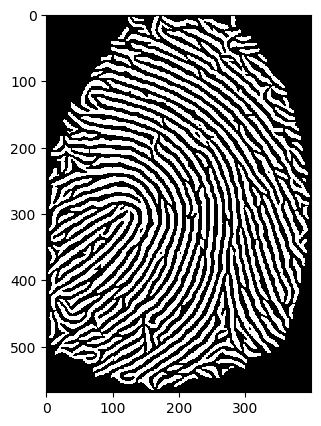

[0]


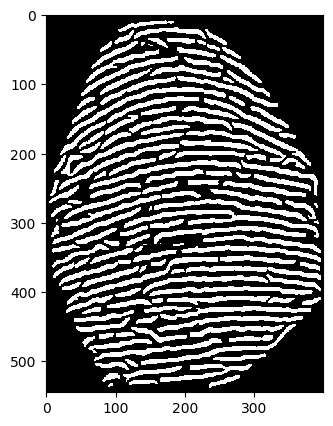

[1]


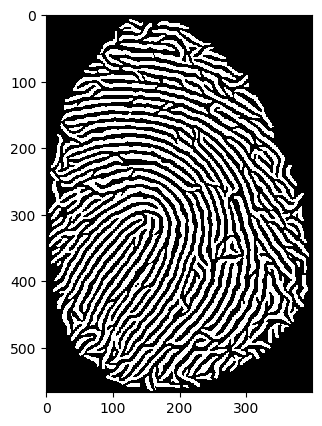

[1]


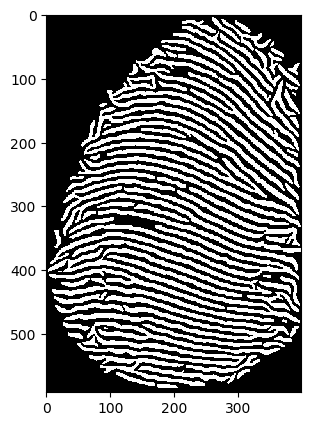

[0]


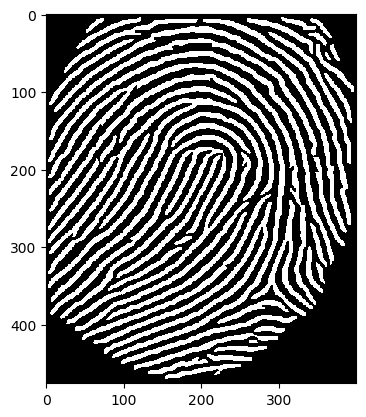

[1]


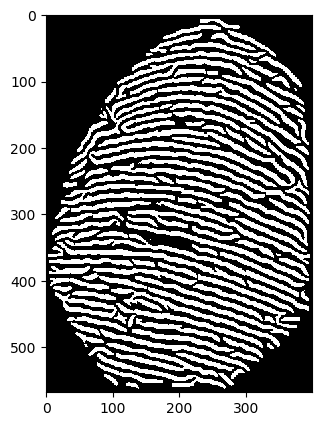

[0]


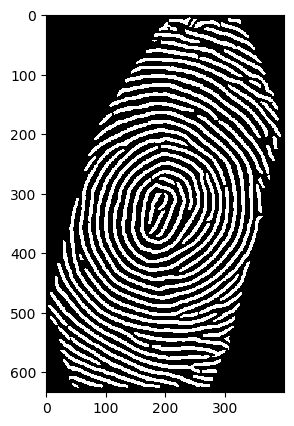

[1]


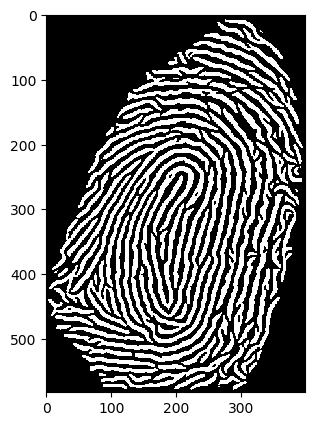

[1]


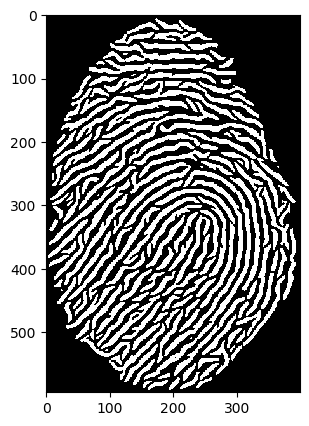

[0]


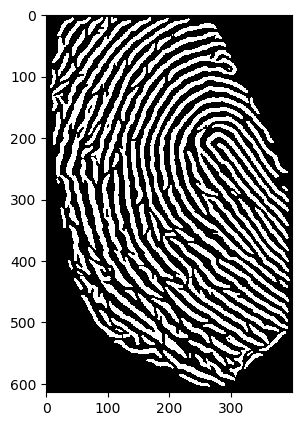

[0]


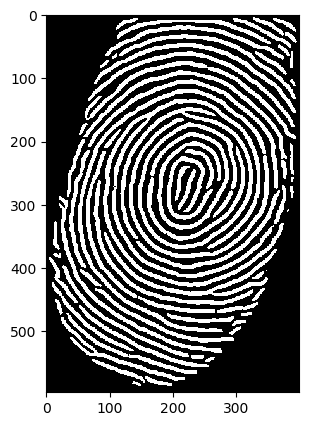

[1]


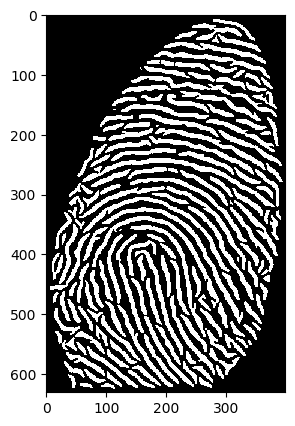

[1]


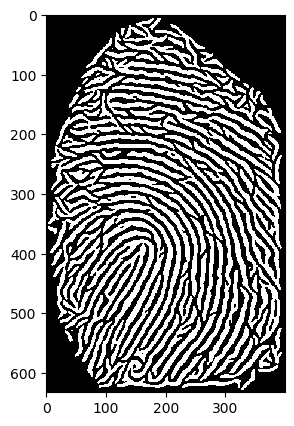

[0]


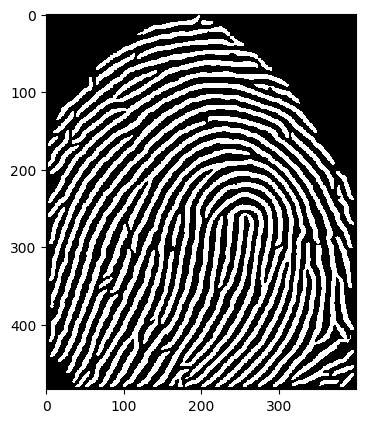

[1]


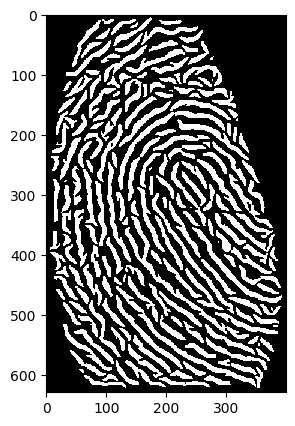

[0]


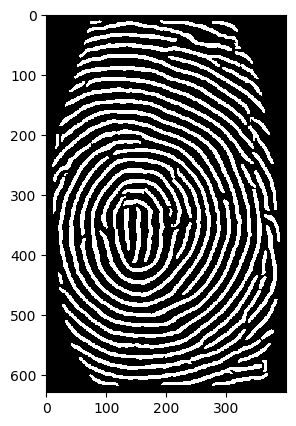

[1]


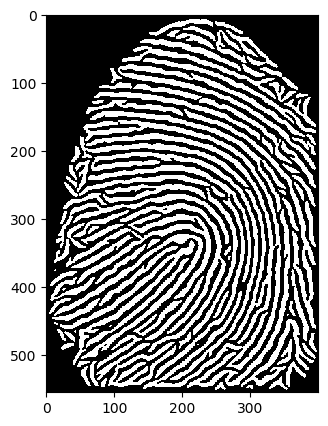

[1]


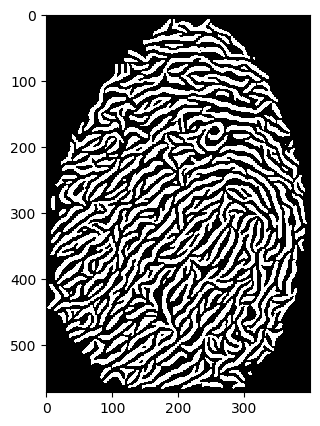

[0]


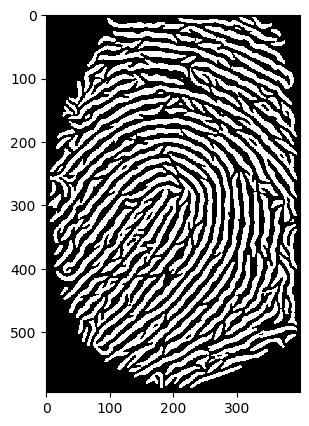

[1]


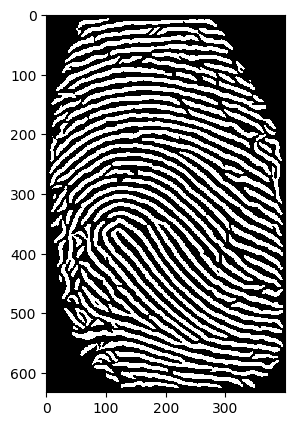

[0]


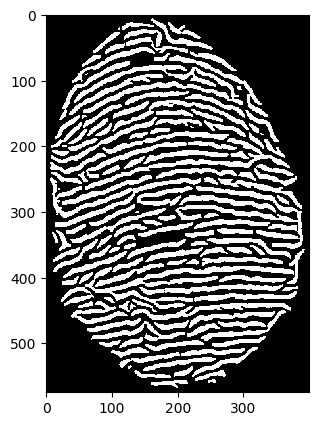

[0]


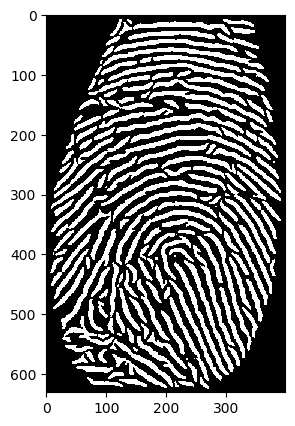

[0]


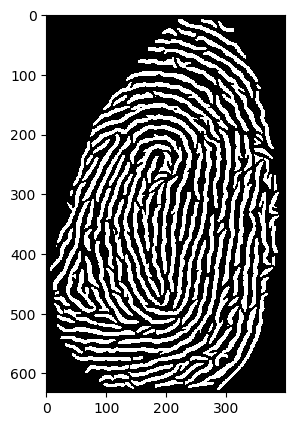

[0]


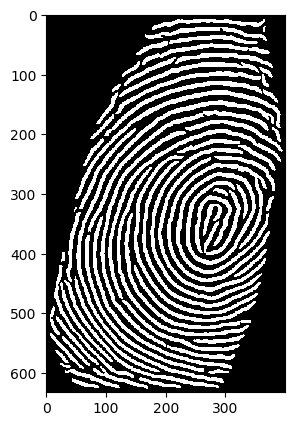

[0]


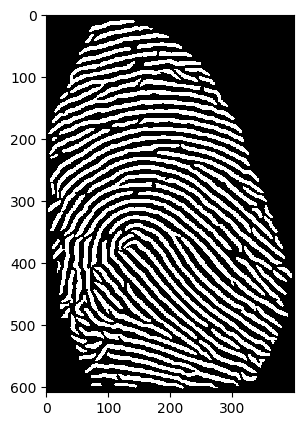

[0]


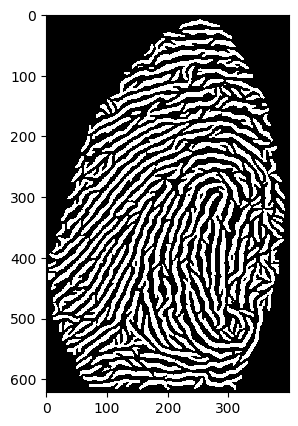

[0]


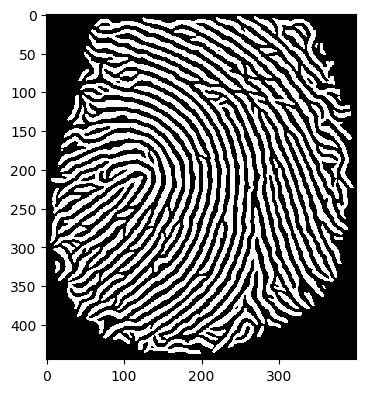

[0]


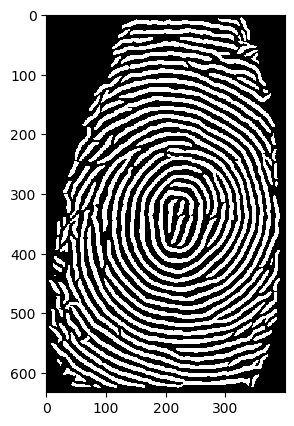

[0]


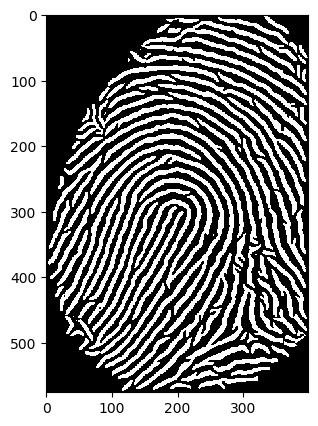

[0]


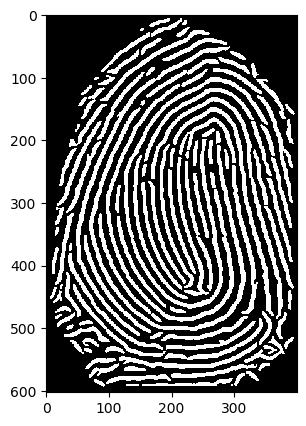

[1]


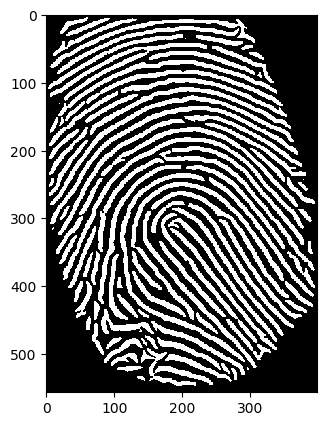

[0]


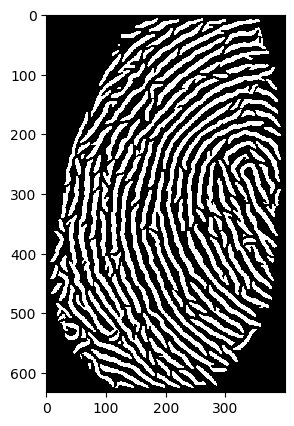

[0]


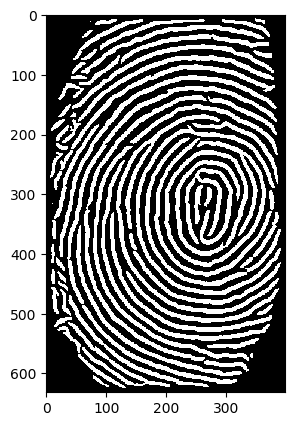

[0]


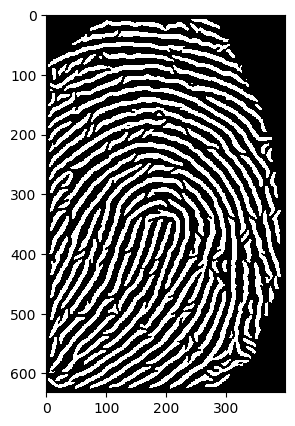

[0]


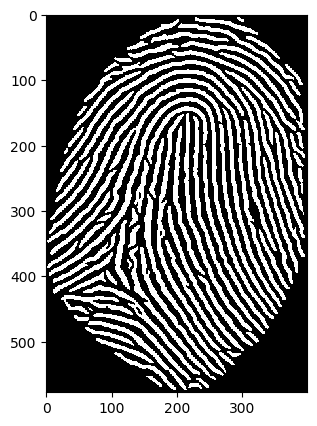

[0]


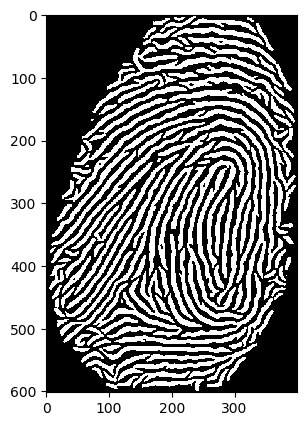

[0]


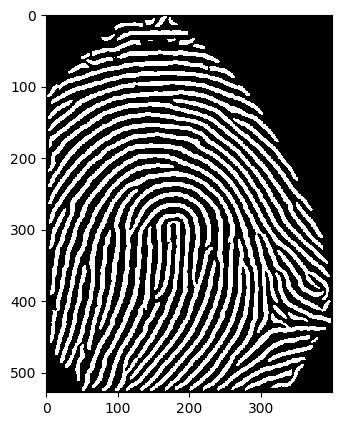

[0]


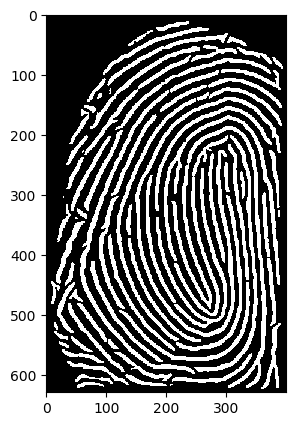

[0]


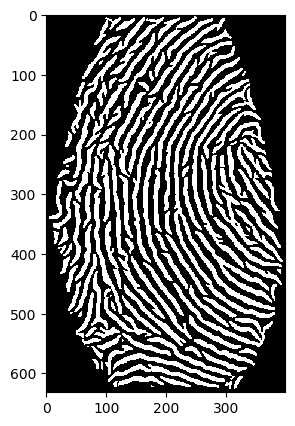

[0]


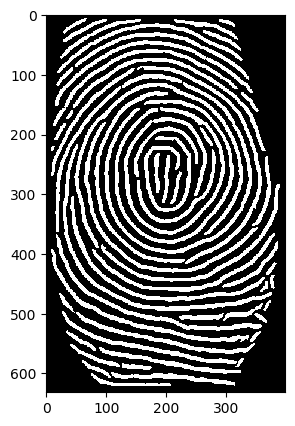

[1]


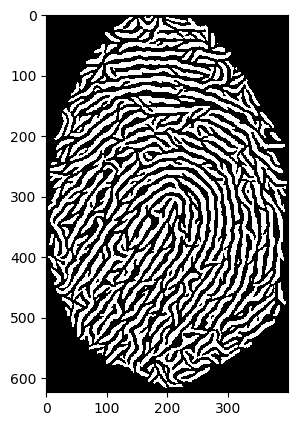

[0]


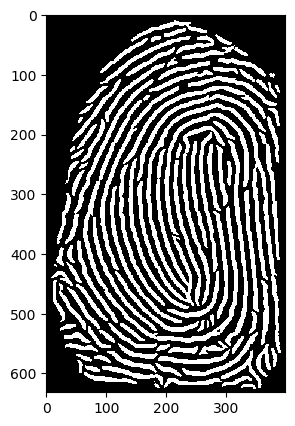

[0]


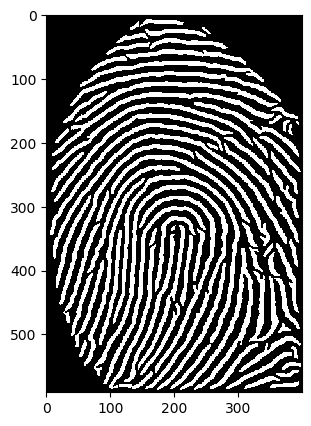

[0]


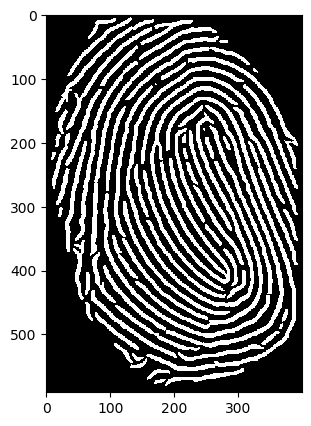

[0]


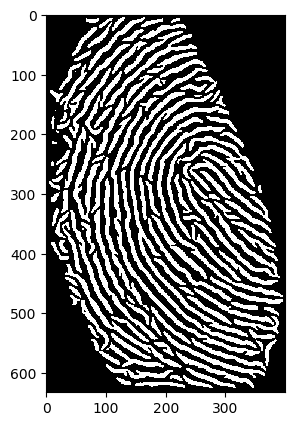

[0]


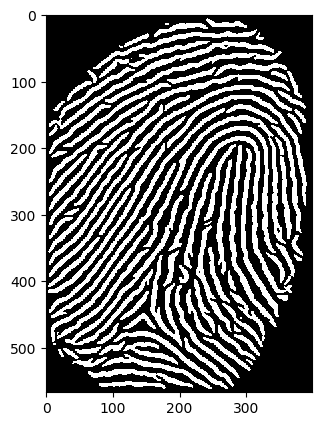

[0]


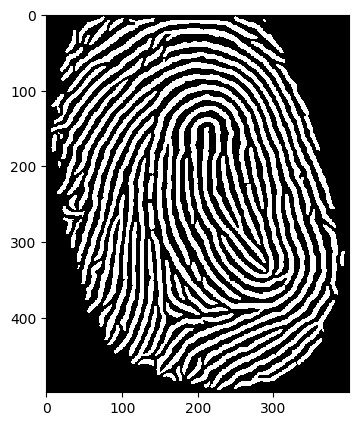

[0]


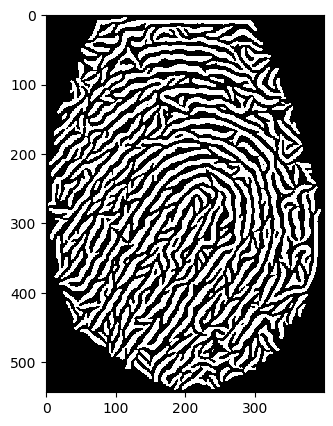

[0]


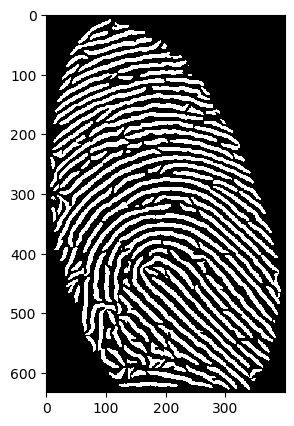

[1]


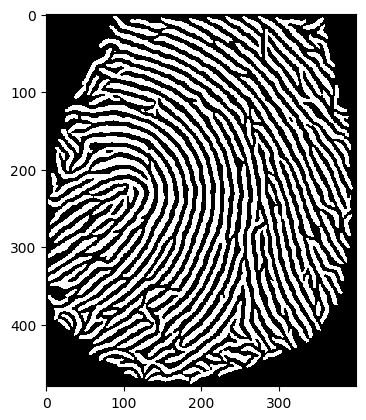

[0]


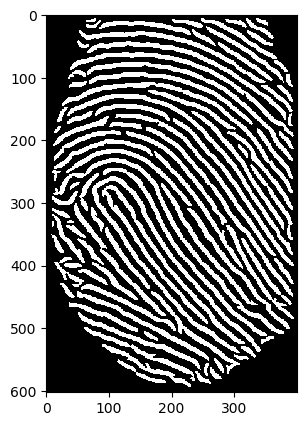

In [15]:
from src.processing.standardization import invers_color
from src.processing.preprocessing import coherence_filter

FILE_PATH = "/home/developer/Desktop/Data base fingerprints/DB4_B/"

for name in os.listdir(FILE_PATH):
        path = FILE_PATH + name
        im = cv.imread(path, cv.IMREAD_GRAYSCALE)
        
        if path == None:
            continue

        
        std_im = standardize_image(im)
        std_im = coherence_filter(std_im, n_iter=9)
        prep_im = preproc_image(std_im)
        percentiles = features(prep_im)
        
        print(svc.predict(percentiles.reshape(1, -1)))
        plt.imshow(prep_im)
        plt.show()
        
        

In [ ]:
processing